## Logistic Regression

- Data Preparation
- Visualization
- Create Train and Test Set
- Create a Logistic Regression Model
- Predictions
- Decision Boundary

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Dumy Data Generation

In [2]:
## Suppose there are two clusters and two features


# For cluster0
mean0 = np.array([1, 0.5])
covariance0 = np.array([[1, 0.1], [0.1, 1.2]])

# For cluster1
mean1 = np.array([4, 5])
covariance1 = np.array([[1.2, 0.1],[0.1, 1.3]])

In [3]:
class0 = np.random.multivariate_normal(mean0, covariance0, size = 500)
class1 = np.random.multivariate_normal(mean1, covariance1, size = 500)

In [4]:
class0.shape, class1.shape # These are two datasets belongs to two different classes

((500, 2), (500, 2))

### Visualization

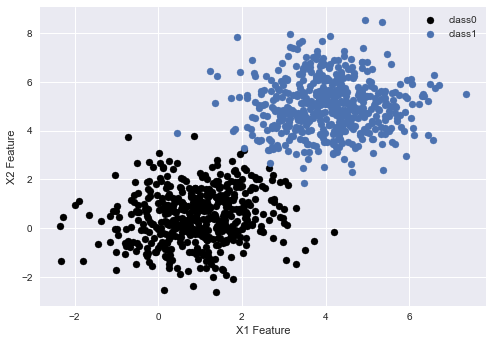

In [5]:
plt.style.use("seaborn")
plt.scatter(x = class0[:, 0], y = class0[:, 1], color = "black", label = "class0")
plt.scatter(x = class1[:, 0], y = class1[:, 1], label = "class1")
plt.xlabel("X1 Feature")
plt.ylabel("X2 Feature")
plt.legend();

In [6]:
### Preparing Dataset

In [7]:
dataset = np.vstack((class0, class1)) # One below another

In [8]:
dataset.shape

(1000, 2)

In [9]:
# Now need to add column Y as well

#Preparing Y
Y = np.zeros((1000, 1))
Y[501:] = 1

dataset = np.hstack((dataset, Y)) # Stacking it horizontally

In [10]:
dataset[:4, :]

array([[ 0.98902589,  2.25332812,  0.        ],
       [ 0.28795788, -1.08511976,  0.        ],
       [ 0.71092017, -1.75682938,  0.        ],
       [-0.54835016,  1.89198538,  0.        ]])

In [11]:
# Shuffle whole dataset

np.random.shuffle(dataset)

In [12]:
dataset[:4, :]

array([[3.88971045, 3.83905832, 1.        ],
       [4.35650588, 5.91882674, 1.        ],
       [0.56599685, 0.95981446, 0.        ],
       [3.08725342, 4.98243523, 0.        ]])

### Prepare Training and Testing Data

In [13]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
Y_train = dataset[:split, -1]

X_test = dataset[split:, :-1]
Y_test = dataset[split:, -1]

In [14]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 2), (800,), (200, 2), (200,))

### Normalization

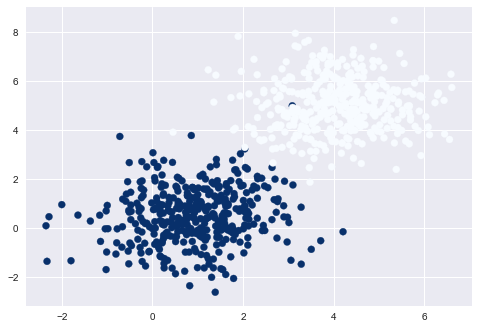

In [15]:
plt.scatter(X_train[:, 0], X_train[:,1], c = Y_train, cmap = plt.cm.Blues_r)
plt.show()

In [16]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

#Training Data

X_train = (X_train - x_mean)/x_std

#Testing Data : 
# No need to calcluate mean & std for testing data, use training data mean & std to deviate points exactly the same amount

X_test = (X_test - x_mean)/x_std

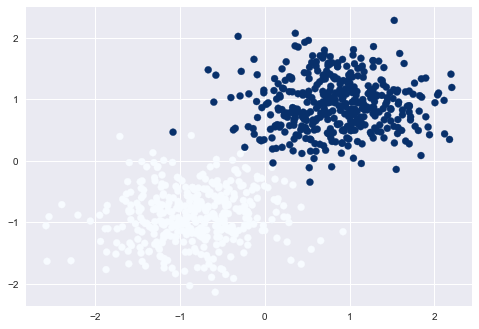

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c =Y_train, cmap = plt.cm.Blues);

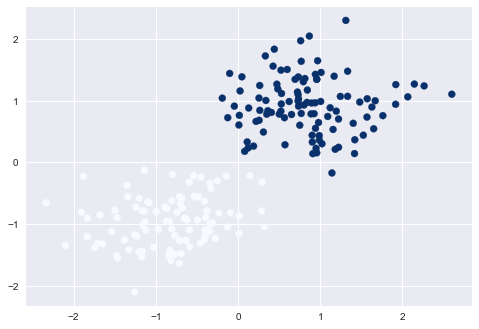

In [18]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test, cmap = plt.cm.Blues);

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
theta = np.empty((1,3))

theta[0, 0] = model.intercept_
theta[0, 1:] = model.coef_

In [22]:
theta

array([[-0.09755137,  2.86438463,  4.32994457]])

In [23]:
model.score(X_train, Y_train)

0.995

In [24]:
Y_pred = model.predict(X_test)

In [25]:
model.score(X_test, Y_test)

1.0

In [26]:
Y_pred

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.])

In [27]:
Y_pred = Y_pred.astype('int_')
Y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1])